In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/dataset.csv")

In [4]:
df.head(3)

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      22000 non-null  object
 1   language  22000 non-null  object
dtypes: object(2)
memory usage: 343.9+ KB


In [6]:
df.isnull().sum()

Text        0
language    0
dtype: int64

In [7]:
df["Text"]=df["Text"].str.lower()
df["Text"]=df["Text"].str.replace('[^\w\s]','')
df["Text"]=df["Text"].str.replace('\d+','')
df["Text"]=df["Text"].str.replace('\n',' ').replace('\r',' ')

In [8]:
x=df.Text
y=df.language

In [9]:
vect=CountVectorizer()
x_yeni=vect.fit_transform(x)

In [10]:
vect=CountVectorizer(lowercase=True,stop_words='english')
x_yeni=vect.fit_transform(x)

In [11]:
print(x_yeni)

  (0, 58560)	1
  (0, 43970)	1
  (0, 106493)	3
  (0, 81338)	1
  (0, 76296)	2
  (0, 81109)	1
  (0, 68593)	1
  (0, 78663)	1
  (0, 2198)	1
  (0, 63955)	1
  (0, 47653)	1
  (0, 53850)	2
  (0, 80376)	1
  (0, 81339)	1
  (0, 45899)	1
  (0, 50101)	1
  (0, 61730)	1
  (0, 113594)	1
  (0, 130)	1
  (0, 118731)	1
  (0, 107812)	1
  (0, 68594)	1
  (0, 124071)	1
  (0, 60024)	1
  (0, 123735)	1
  :	:
  (21999, 17614)	2
  (21999, 5001)	1
  (21999, 75005)	1
  (21999, 66949)	1
  (21999, 82690)	1
  (21999, 124963)	1
  (21999, 38640)	1
  (21999, 6168)	1
  (21999, 106367)	1
  (21999, 126498)	1
  (21999, 41392)	1
  (21999, 6182)	1
  (21999, 105346)	1
  (21999, 85468)	1
  (21999, 71709)	1
  (21999, 103218)	2
  (21999, 70506)	1
  (21999, 96812)	1
  (21999, 70259)	2
  (21999, 103017)	1
  (21999, 103734)	1
  (21999, 89519)	1
  (21999, 20370)	1
  (21999, 124903)	1
  (21999, 44302)	1


In [14]:
x_train,x_test,y_train,y_test=train_test_split(x_yeni,y,random_state=42)

In [15]:
mb=MultinomialNB()

In [16]:
mb.fit(x_train,y_train)

MultinomialNB()

In [17]:
tahmin=mb.predict(x_test)

In [18]:
accuracy_score(y_test,tahmin)

0.9221818181818182

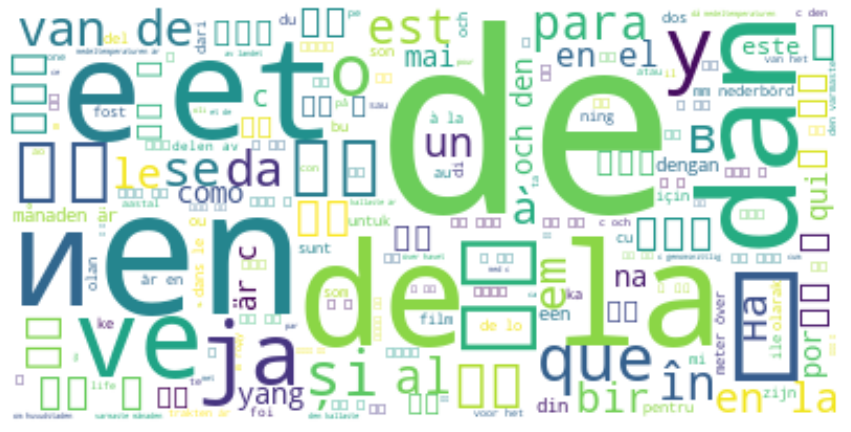

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in df.Text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()